In [1]:
import pandas as pd
import numpy as np
import os
import gc
import datetime as dt
import warnings

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
p = matplotlib.rcParams
p["font.size"] = 20
p["axes.unicode_minus"] = False
p['lines.linewidth'] = 3
p['pdf.fonttype'] = 42
p['ps.fonttype'] = 42
p["figure.figsize"] = [12, 8]
p['grid.color'] = 'k'
p['grid.linestyle'] = ':'
p['grid.linewidth'] = 0.5
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 5))  
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPRegressor,MLPClassifier
from xgboost import XGBClassifier, XGBRegressor

from sklearn.linear_model import LassoCV,Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn import preprocessing

import warnings 
warnings.filterwarnings('ignore')


In [78]:
x1 = np.random.normal(0,size=50000)
x2 = np.random.normal(0,size=50000)
x3 = np.random.normal(0,size=50000)
x4 = np.random.standard_t(8,size=50000)

x5 = np.linspace(-3,3,num=50000)
np.random.shuffle(x5)

x6 = np.linspace(-3,3,num=50000)
np.random.shuffle(x6)


residual = np.random.standard_t(10,size=50000)
simulation = pd.DataFrame(data=np.array([x1,x2,x3,x4,x5,x6,residual]).T)
simulation.columns = ['x1','x2','x3','x4','x5','x6','residual']

def transform1(x):
    if x>1.2 or x<-0.5:
        return(x)
    else:
        return(0)

def transform2(x):
    if 3>x>1.2:
        return(x**2)
    elif x>-2.5:
        return(-x-1)
    else:
        return(0)
        
def transform45(x):
    return(int(x.x4>1 and x.x5<-0.7))       

simulation['x1_transform'] = simulation.x1.apply(transform1)
simulation['x2_transform'] = simulation.x2.apply(transform2)
simulation['x45_transform'] = simulation.apply(transform45,axis=1)
simulation['x3_transform'] = np.sin(np.pi/2*simulation.x3) 
simulation['x4_transform'] = np.sin(simulation.x4)

simulation['y'] = simulation['x1_transform']*3 - simulation['x3_transform']*2 - simulation['x45_transform']*5 \
         + simulation['x2_transform']  + simulation['residual']

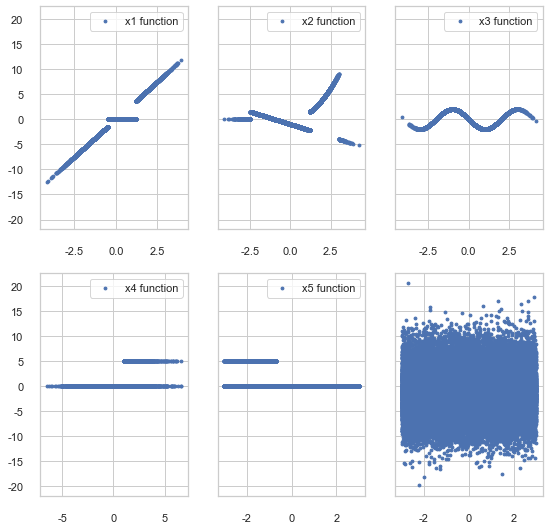

In [79]:
fig,axes = plt.subplots(2,3,sharey=True,figsize=(9,9))
axes[0,0].scatter(simulation['x1'],simulation['x1_transform']*3,s=8,label='x1 function')
axes[0,1].scatter(simulation['x2'],simulation['x2_transform'],s=8,label='x2 function')
axes[0,2].scatter(simulation['x3'],-simulation['x3_transform']*2,s=8,label='x3 function')
axes[1,0].scatter(simulation['x4'],simulation['x45_transform']*5,s=8,label='x4 function')
axes[1,1].scatter(simulation['x5'],simulation['x45_transform']*5,s=8,label='x5 function')
axes[1,2].scatter(simulation['x6'],simulation['y'],s=8,label='x6 vs y')

axes[0,0].legend(loc='upper right')
axes[0,1].legend(loc='upper right')
axes[0,2].legend(loc='upper right')
axes[1,0].legend(loc='upper right')
axes[1,1].legend(loc='upper right')
plt.show()

In [80]:
#simulation = pd.read_csv('simulation_data.csv')
X = simulation[['x1','x2','x3','x4','x5','x6']]
Y = simulation['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=52)
train = pd.merge(X_train,simulation)
test = pd.merge(X_test,simulation)

In [81]:
def metrics(model):  
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    scores = cross_val_score(model, X_train,y_train, cv=5)
    print('Train')
    print('CV score: %f'%np.mean(scores))
    print('MSE: %f '%mse(y_train, train_pred))
    print('-----------------------------------------')
    
    scores = cross_val_score(model, X_test,y_test, cv=5)
    print('Test')
    print('CV score: %f'%np.mean(scores))
    print('MSE: %f'%mse(y_test, test_pred))

def transform_plot(model):
    train_pred = model.predict(X_train)
    
    fig,axes = plt.subplots(2,2,sharey=True,figsize=(9,9))
    axes[0,0].scatter(X_train['x1'],y_train,label='true x1')
    axes[0,0].scatter(X_train['x1'],train['x1_transform']*5,label='function')
    axes[0,1].scatter(X_train['x1'],train_pred,label='pred x1')
    axes[0,1].scatter(X_train['x1'],train['x1_transform']*5,label='function')
    
    axes[1,0].scatter(train['x1_transform'],y_train,label='true x1_transform')
    axes[1,1].scatter(train['x1_transform'],train_pred,label='pred x1_transform')

    axes[0,0].legend(loc='upper right')
    axes[0,1].legend(loc='upper right')
    axes[1,0].legend(loc='upper right')
    axes[1,1].legend(loc='upper right')
    plt.show()

    fig,axes = plt.subplots(2,2,sharey=True,figsize=(9,9))
    axes[0,0].scatter(X_train['x2'],y_train,label='true x2')
    axes[0,0].scatter(X_train['x2'],train['x2_transform'],label='function')
    axes[0,1].scatter(X_train['x2'],train_pred,label='pred x2')
    axes[0,1].scatter(X_train['x2'],train['x2_transform'],label='function')
    
    axes[1,0].scatter(train['x2_transform'],y_train,label='true x2_transform')
    axes[1,1].scatter(train['x2_transform'],train_pred,label='pred x2_transform')

    axes[0,0].legend(loc='upper right')
    axes[0,1].legend(loc='upper right')
    axes[1,0].legend(loc='upper right')
    axes[1,1].legend(loc='upper right')
    plt.show()

    fig,axes = plt.subplots(2,2,sharey=True,figsize=(9,9))
    axes[0,0].scatter(X_train['x3'],y_train,label='true x3')
    axes[0,0].scatter(X_train['x3'],-train['x3_transform']*3,label='function')
    axes[0,1].scatter(X_train['x3'],train_pred,label='pred x3')
    axes[0,1].scatter(X_train['x3'],-train['x3_transform']*3,label='function')
    
    axes[1,0].scatter(-train['x3_transform']*3,y_train,label='true x3_transform')
    axes[1,1].scatter(-train['x3_transform']*3,train_pred,label='pred x3_transform')

    axes[0,0].legend(loc='upper right')
    axes[0,1].legend(loc='upper right')
    axes[1,0].legend(loc='upper right')
    axes[1,1].legend(loc='upper right')
    plt.show()

In [82]:
#lasso
lasso = LassoCV(cv=5,fit_intercept=True,alphas=np.linspace(0.00001,0.001,100)).fit(X_train,y_train) 
lasso_train=lasso.predict(X_train)
metrics(lasso)

Train
CV score: 0.520707
MSE: 6.849549 
-----------------------------------------
Test
CV score: 0.530270
MSE: 6.807841


In [83]:
#KNN
for n in [10,20,50,100,200]:
    knn = KNeighborsRegressor(n_neighbors=n)
    scores = cross_val_score(knn, preprocessing.scale(X_train),y_train, cv=5)
    print(n,np.mean(scores))
knn = KNeighborsRegressor(n_neighbors=10).fit(preprocessing.scale(X_train),y_train)
metrics(knn)

10 0.7896986300683771
20 0.7840795538060614
50 0.7602504124443591
100 0.7325141842209273
200 0.6946234307850474
Train
CV score: 0.760708
MSE: 2.859120 
-----------------------------------------
Test
CV score: 0.731979
MSE: 3.371798


In [84]:
# DT
DT = DecisionTreeRegressor(max_depth=10,random_state=0).fit(X_train,y_train)
metrics(DT)
#transform_plot(DT)


Train
CV score: 0.862978
MSE: 1.419708 
-----------------------------------------
Test
CV score: 0.835673
MSE: 1.951203


In [85]:
# Adaboost
ada = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train,y_train)
print('Adaboost:')
metrics(ada)

Adaboost:
Train
CV score: 0.803915
MSE: 2.619011 
-----------------------------------------
Test
CV score: 0.801876
MSE: 2.684121


In [86]:
# Random Forest
for n in [2,4,6,10,20]:
    rf = RandomForestRegressor(max_depth=n)
    scores = cross_val_score(rf, X_train,y_train, cv=5)
    print(n,np.mean(scores))
rf = RandomForestRegressor(max_depth=10).fit(X_train,y_train)
print('Random Forest: ')
metrics(rf)

2 0.4878523099636366
4 0.6871318636087371
6 0.8163406340990896
10 0.8910124062569815
20 0.8919523354074382
Random Forest: 
Train
CV score: 0.891156
MSE: 1.217902 
-----------------------------------------
Test
CV score: 0.879994
MSE: 1.588136


In [87]:
# XGBoost
xg = XGBRegressor(max_depth=10).fit(X_train,y_train)
print('XGBoost:')
metrics(xg)

[22:53:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost:
[22:53:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train
CV score: 0.896206
MSE: 0.700180 
-----------------------------------------
[22:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

In [88]:
# Gradint Boost
gb = GradientBoostingRegressor(random_state=0, n_estimators=100).fit(X_train,y_train)
print('Gradient Boost:')
metrics(gb)

Gradient Boost:
Train
CV score: 0.906540
MSE: 1.283497 
-----------------------------------------
Test
CV score: 0.902837
MSE: 1.361592


In [89]:
# MLP
mlp = MLPRegressor(solver='lbfgs', alpha=0.01,hidden_layer_sizes=(15,3), random_state=1).fit(X_train,y_train)
print('MLP:')
metrics(mlp)

MLP:
Train
CV score: 0.855580
MSE: 2.069103 
-----------------------------------------
Test
CV score: 0.856301
MSE: 2.023621


## PDP

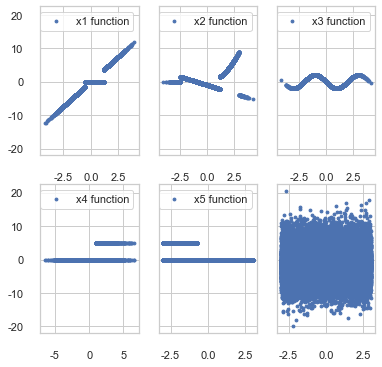

In [94]:
fig,axes = plt.subplots(2,3,sharey=True,figsize=(6,6))
axes[0,0].scatter(simulation['x1'],simulation['x1_transform']*3,s=8,label='x1 function')
axes[0,1].scatter(simulation['x2'],simulation['x2_transform'],s=8,label='x2 function')
axes[0,2].scatter(simulation['x3'],-simulation['x3_transform']*2,s=8,label='x3 function')
axes[1,0].scatter(simulation['x4'],simulation['x45_transform']*5,s=8,label='x4 function')
axes[1,1].scatter(simulation['x5'],simulation['x45_transform']*5,s=8,label='x5 function')
axes[1,2].scatter(simulation['x6'],simulation['y'],s=8,label='x6 vs y')

axes[0,0].legend(loc='upper right')
axes[0,1].legend(loc='upper right')
axes[0,2].legend(loc='upper right')
axes[1,0].legend(loc='upper right')
axes[1,1].legend(loc='upper right')
plt.show()

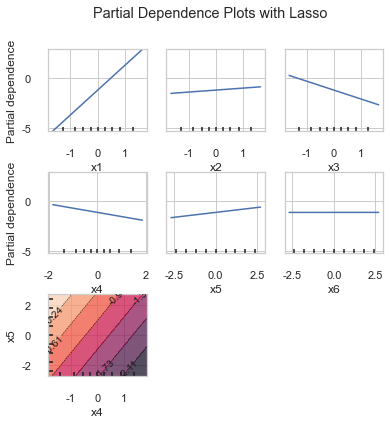

In [90]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import plot_partial_dependence
features = list(range(6))
features.append((3,4))

plot_partial_dependence(lasso, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with Lasso')
fig.subplots_adjust(hspace=0.5)

In [ ]:
plot_partial_dependence(knn, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with KNN')
fig.subplots_adjust(hspace=0.5)

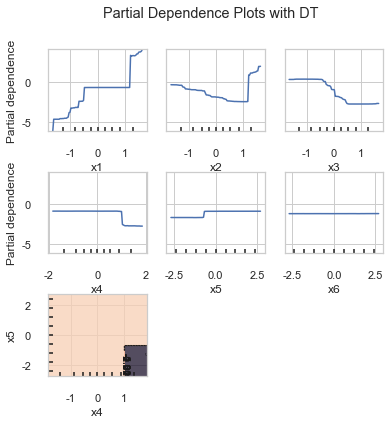

In [91]:
plot_partial_dependence(DT, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with DT')
fig.subplots_adjust(hspace=0.5)

In [50]:
plot_partial_dependence(ada, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with ada')
fig.subplots_adjust(hspace=0.5)

KeyboardInterrupt: 

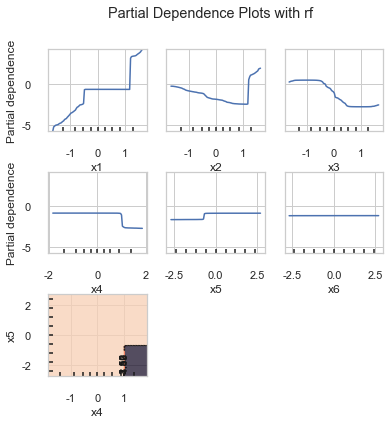

In [92]:
plot_partial_dependence(rf, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with rf')
fig.subplots_adjust(hspace=0.5)

In [47]:
xg = XGBRegressor(max_depth=10)
xg.fit(X_train,y_train)
plot_partial_dependence(xg, X_train, features,fig=fig) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with xg')
fig.subplots_adjust(hspace=0.5)

[22:14:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


NotFittedError: This XGBRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

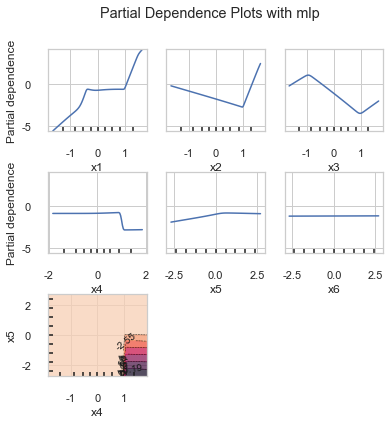

In [93]:
plot_partial_dependence(mlp, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with mlp')
fig.subplots_adjust(hspace=0.5)

## SHAP

In [99]:
import shap
rf_shap = shap.TreeExplainer(rf)
DT_shap = shap.TreeExplainer(DT)
#ada_shap = shap.TreeExplainer(ada)
xg_shap = shap.TreeExplainer(xg)
gb_shap = shap.TreeExplainer(gb)

In [102]:
# Decision Tree
DT_shap_values = DT_shap.shap_values(X_train)
DT_shap_interaction = DT_shap.shap_interaction_values(X_train)

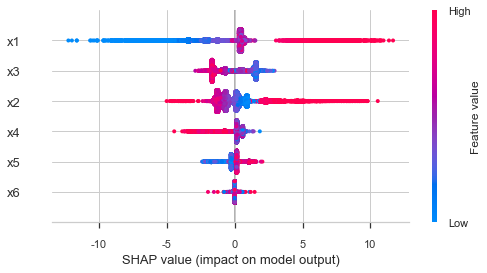

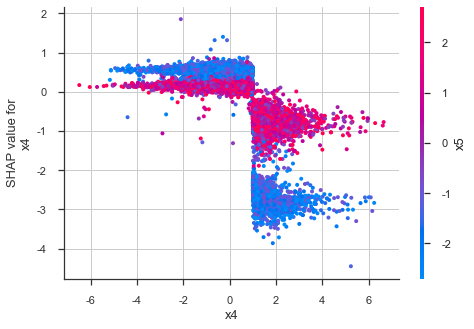

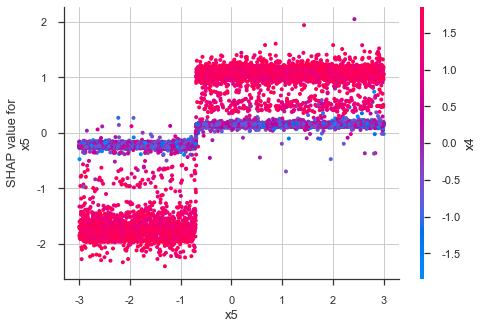

In [123]:
shap.summary_plot(DT_shap_values, X_train)
shap.dependence_plot(3, DT_shap_values, X_train)
shap.dependence_plot(4, DT_shap_values, X_train)

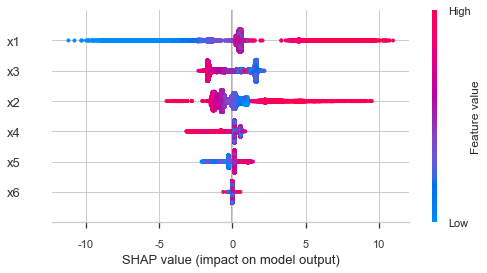

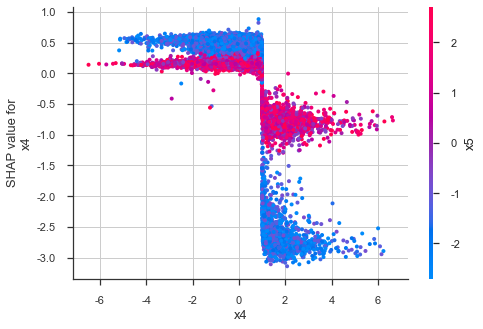

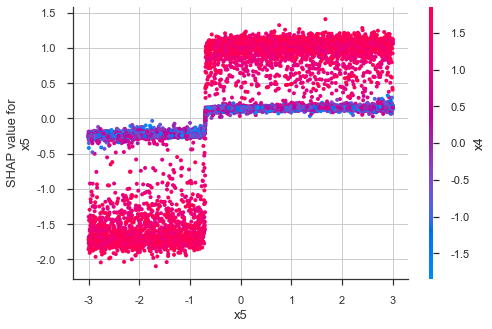

In [124]:
# Random Forest
rf_shap_values = rf_shap.shap_values(X_train)
rf_shap_interaction = rf_shap.shap_interaction_values(X_train)
shap.summary_plot(rf_shap_values, X_train)
shap.dependence_plot(3, rf_shap_values, X_train)
shap.dependence_plot(4, rf_shap_values, X_train)

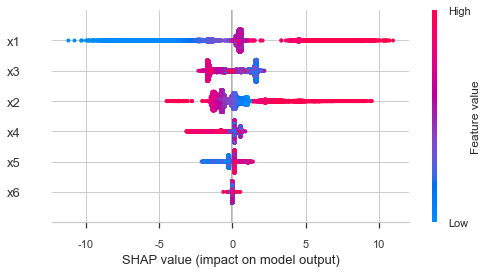

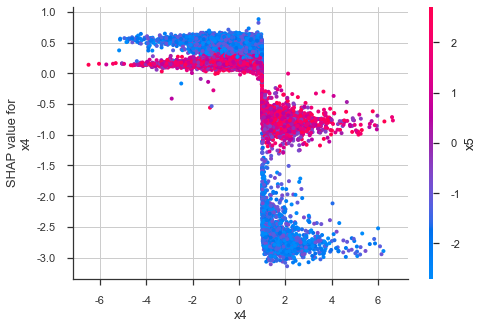

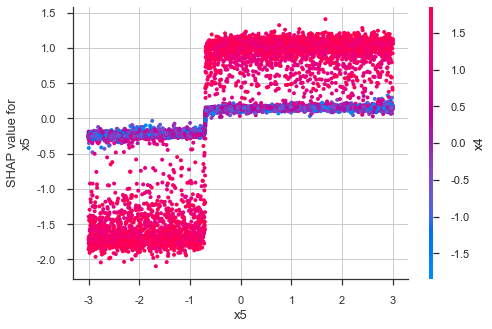

In [125]:
# Gradient Boost
gb_shap_values = rf_shap.shap_values(X_train)
rf_shap_interaction = rf_shap.shap_interaction_values(X_train)
shap.summary_plot(rf_shap_values, X_train)
shap.dependence_plot(3, rf_shap_values, X_train)
shap.dependence_plot(4, rf_shap_values, X_train)

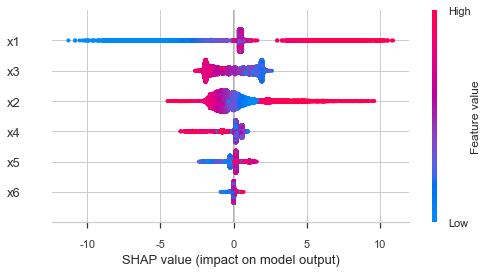

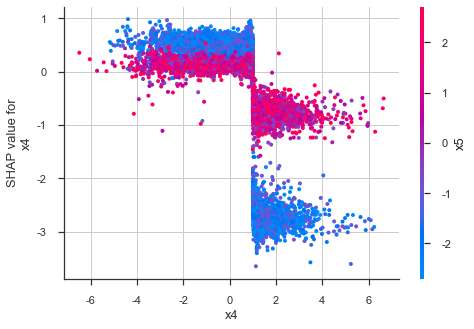

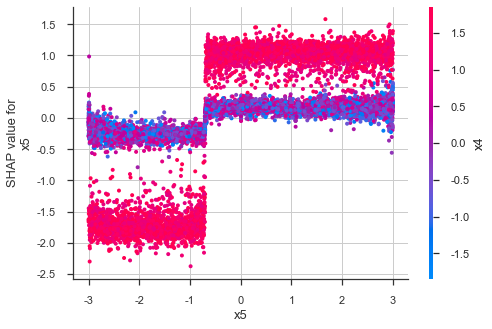

In [126]:
# XGBoosting
xg_shap_values = xg_shap.shap_values(X_train)
xg_shap_interaction = xg_shap.shap_interaction_values(X_train)
shap.summary_plot(xg_shap_values, X_train)
shap.dependence_plot(3, xg_shap_values, X_train)
shap.dependence_plot(4, xg_shap_values, X_train)

## More Complicated Interactions

In [138]:
x1 = np.random.normal(0,size=50000)
x2 = np.random.normal(0,size=50000)
x3 = np.random.normal(0,size=50000)
x4 = np.random.standard_t(8,size=50000)

x5 = np.linspace(-3,3,num=50000)
np.random.shuffle(x5)

x6 = np.linspace(-3,3,num=50000)
np.random.shuffle(x6)


residual = np.random.standard_t(10,size=50000)
simulation = pd.DataFrame(data=np.array([x1,x2,x3,x4,x5,x6,residual]).T)
simulation.columns = ['x1','x2','x3','x4','x5','x6','residual']

def transform1(x):
    if x>1.2 or x<-0.5:
        return(x)
    else:
        return(0)

def transform2(x):
    if 3>x>1.2:
        return(x**2)
    elif x>-2.5:
        return(-x-1)
    else:
        return(0)
        
def transform45(x):
    if x.x4>1 and x.x5<-0.2:
        return(x.x4*x.x5)
    else:
        return(x.x5/2)       

simulation['x1_transform'] = simulation.x1.apply(transform1)
simulation['x2_transform'] = simulation.x2.apply(transform2)
simulation['x45_transform'] = simulation.apply(transform45,axis=1)
simulation['x3_transform'] = np.sin(np.pi/2*simulation.x3) 
simulation['x4_transform'] = np.sin(simulation.x4)

simulation['y'] = simulation['x1_transform']*3 - simulation['x3_transform']*2 - simulation['x45_transform']*5 \
         + simulation['x2_transform']  + simulation['residual']

In [139]:
X = simulation[['x1','x2','x3','x4','x5','x6']]
Y = simulation['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=52)
train = pd.merge(X_train,simulation)
test = pd.merge(X_test,simulation)

In [140]:
lasso = LassoCV(cv=5,fit_intercept=True,alphas=np.linspace(0.00001,0.001,100)).fit(X_train,y_train) 
DT = DecisionTreeRegressor(max_depth=10,random_state=0).fit(X_train,y_train)
knn = KNeighborsRegressor(n_neighbors=10).fit(preprocessing.scale(X_train),y_train)
rf = RandomForestRegressor(max_depth=10).fit(X_train,y_train)
ada = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train,y_train)
xg = XGBRegressor(max_depth=10).fit(X_train,y_train)
gb = GradientBoostingRegressor(random_state=0, n_estimators=100).fit(X_train,y_train)
mlp = MLPRegressor(solver='lbfgs', alpha=0.01,hidden_layer_sizes=(15,3), random_state=1).fit(X_train,y_train)

[09:18:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


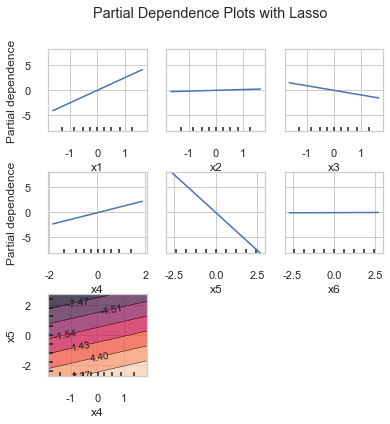

In [141]:
plot_partial_dependence(lasso, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with Lasso')
fig.subplots_adjust(hspace=0.5)

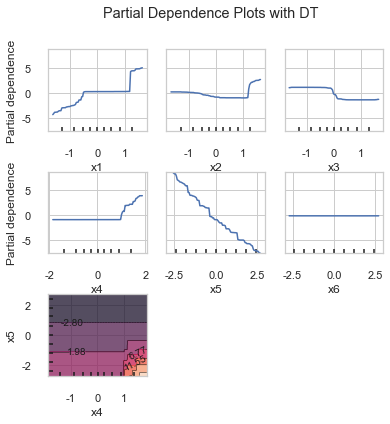

In [142]:
plot_partial_dependence(DT, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with DT')
fig.subplots_adjust(hspace=0.5)

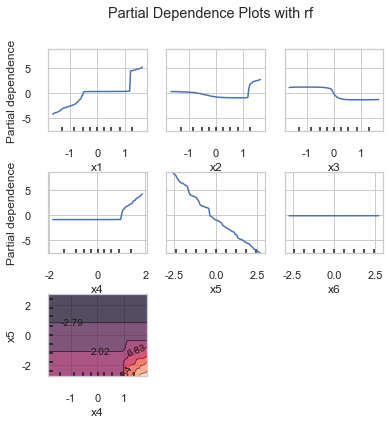

In [143]:
plot_partial_dependence(rf, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with rf')
fig.subplots_adjust(hspace=0.5)

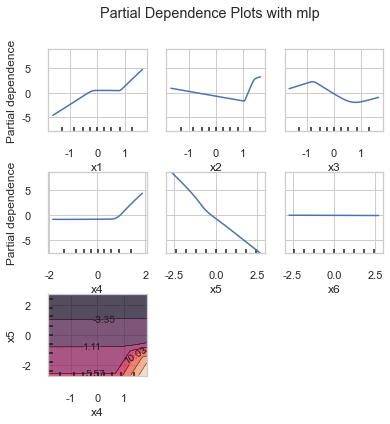

In [144]:
plot_partial_dependence(mlp, X_train, features) 
fig = plt.gcf()
fig.set_size_inches(6, 6) 

fig.suptitle('Partial Dependence Plots with mlp')
fig.subplots_adjust(hspace=0.5)

In [145]:
rf_shap = shap.TreeExplainer(rf)
DT_shap = shap.TreeExplainer(DT)
#ada_shap = shap.TreeExplainer(ada)
xg_shap = shap.TreeExplainer(xg)
gb_shap = shap.TreeExplainer(gb)

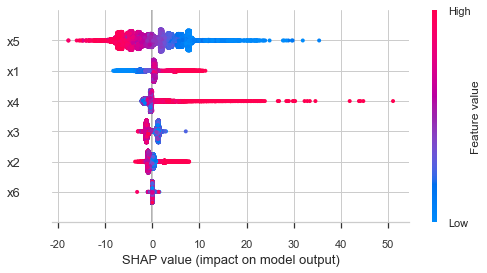

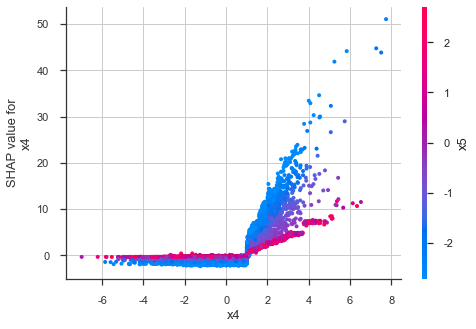

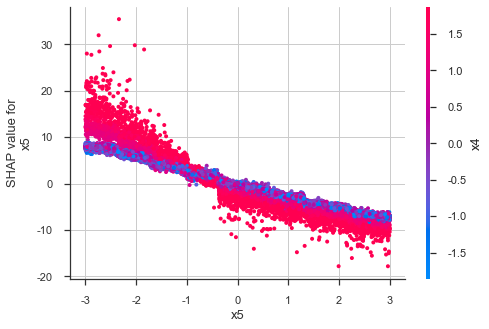

In [146]:
# Decision Tree
DT_shap_values = DT_shap.shap_values(X_train)
DT_shap_interaction = DT_shap.shap_interaction_values(X_train)
shap.summary_plot(DT_shap_values, X_train)
shap.dependence_plot(3, DT_shap_values, X_train)
shap.dependence_plot(4, DT_shap_values, X_train)

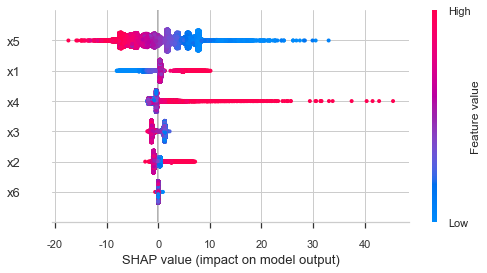

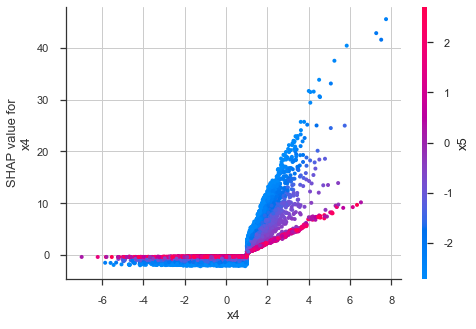

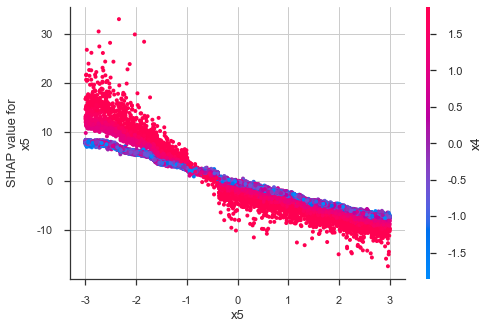

In [147]:
# Random Forest
rf_shap_values = rf_shap.shap_values(X_train)
rf_shap_interaction = rf_shap.shap_interaction_values(X_train)
shap.summary_plot(rf_shap_values, X_train)
shap.dependence_plot(3, rf_shap_values, X_train)
shap.dependence_plot(4, rf_shap_values, X_train)

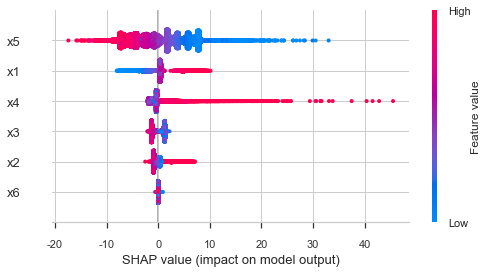

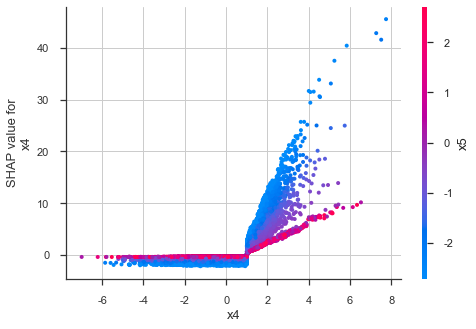

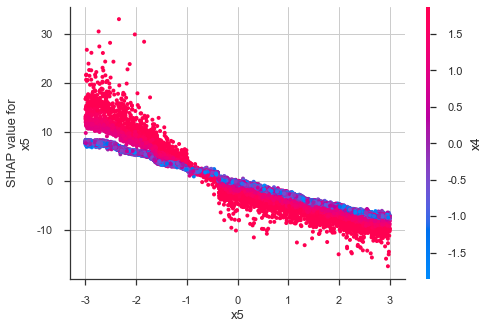

In [148]:
# Gradient Boost
gb_shap_values = rf_shap.shap_values(X_train)
rf_shap_interaction = rf_shap.shap_interaction_values(X_train)
shap.summary_plot(rf_shap_values, X_train)
shap.dependence_plot(3, rf_shap_values, X_train)
shap.dependence_plot(4, rf_shap_values, X_train)

In [ ]:
# XGBoosting
xg_shap_values = xg_shap.shap_values(X_train)
xg_shap_interaction = xg_shap.shap_interaction_values(X_train)
shap.summary_plot(xg_shap_values, X_train)
shap.dependence_plot(3, xg_shap_values, X_train)
shap.dependence_plot(4, xg_shap_values, X_train)